In [1]:
from google.colab import files

uploaded = files.upload()

Saving wine.csv to wine.csv


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
df= pd.read_csv("wine.csv")
df.head(7)

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [3]:
#i am droping to comparing with cluster made target
df=df.drop(['Type'],axis=1)

In [4]:
df.shape


(178, 13)

In [5]:
df.describe()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
df.isnull().sum()


Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#We are doing PCA so no need to perform boxplot and hist and other EDA things because it will creat it's own column


In [7]:
#transforming the data
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
X= SS.fit_transform(df)
X=pd.DataFrame(X)
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


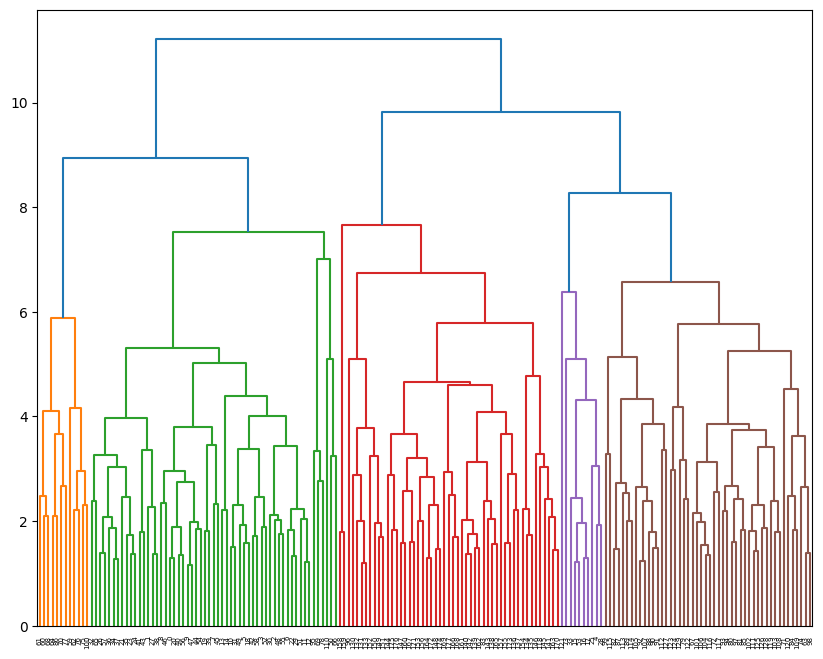

In [9]:
# As we already have standradize data, create Dendrograms
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(10,8))
dendrogram=sch.dendrogram(sch.linkage(X,'complete'))

#Hierarchal Method
#Aglomerative clustering

In [10]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,
                                affinity= 'euclidean',
                                linkage= 'single')


In [11]:
clusters= cluster.fit_predict(X)
clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [12]:
Y= pd.DataFrame(clusters)
Y.value_counts()

0    174
1      3
2      1
dtype: int64

#with complete linkage method

In [13]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,
                                affinity= 'euclidean',
                                linkage= 'complete')

In [14]:
clusters= cluster.fit_predict(X)
clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [15]:
clusters= cluster.fit_predict(X)
clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [17]:
Y= pd.DataFrame(clusters)
Y.value_counts()

0    69
1    58
2    51
dtype: int64

#complete linkage method showing better result

In [18]:
#perparing the data frame with complete method
df['C_Cluster']=cluster.labels_
df.head(10)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  C_Cluster        178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


#Kmeans

In [19]:
df1= pd.read_csv("wine.csv")
df1=df1.drop(['Type'],axis=1)


In [20]:
#transforming the data
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
X1= SS.fit_transform(df1)
X1=pd.DataFrame(X)
X1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [21]:
from sklearn.cluster import KMeans
Kmeans=KMeans(n_clusters=3 , n_init = 20)

clusters1=Kmeans.fit_predict(X1)
clusters1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int32)

In [22]:
Y2= pd.DataFrame(clusters1)
Y2.value_counts()

2    65
0    62
1    51
dtype: int64

In [23]:
Kmeans.inertia_


1277.9284888446423

In [24]:
#checking with elbow curve
j=[]
for i in range(1,11):
    from  sklearn.cluster import  KMeans
    Kmeans=KMeans(n_clusters= i, n_init=20)
    Kmeans.fit_predict(X1)
    j.append(Kmeans.inertia_)

j

[2314.0,
 1659.0079672511501,
 1277.9284888446423,
 1180.1665831581079,
 1108.4966813776437,
 1046.0451895395606,
 991.0868066706461,
 948.435396432812,
 889.2821037168105,
 848.2924232288525]

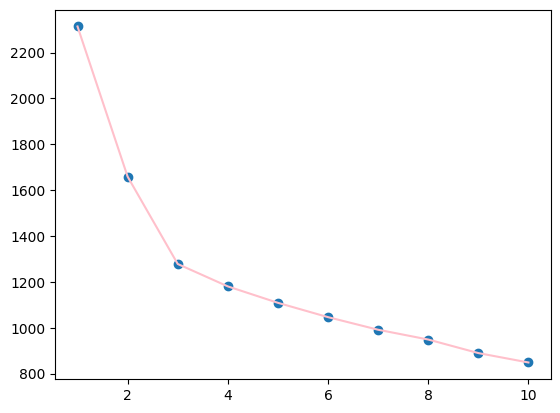

In [25]:
#ploting the elbow curve

plt.scatter(range(1,11),j)
plt.plot(range(1,11),j,color='pink')
plt.show()

#as we can see that 3 cluster is good for the set


In [26]:
df1['Target']=Kmeans.labels_
df1.info()
df1.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
 13  Target           178 non-null    int32  
dtypes: float64(11), int32(1), int64(2)
memory usage: 18.9 KB


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Target
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,3
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,3
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,3
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,3
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,3
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,3
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295,7
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,3
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045,3


#Now this our final data set with target veriable for PCA

In [27]:
X= df1.iloc[:,0:-1]
Y=df1.iloc[:,-1]

In [29]:
print(X.info())

print(Y.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          178 non-null    float64
 1   Malic            178 non-null    float64
 2   Ash              178 non-null    float64
 3   Alcalinity       178 non-null    float64
 4   Magnesium        178 non-null    int64  
 5   Phenols          178 non-null    float64
 6   Flavanoids       178 non-null    float64
 7   Nonflavanoids    178 non-null    float64
 8   Proanthocyanins  178 non-null    float64
 9   Color            178 non-null    float64
 10  Hue              178 non-null    float64
 11  Dilution         178 non-null    float64
 12  Proline          178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB
None
<class 'pandas.core.series.Series'>
RangeIndex: 178 entries, 0 to 177
Series name: Target
Non-Null Count  Dtype
--------------  -----
178 non-null  

In [30]:
#Transforming the data for PCA
from sklearn.preprocessing import StandardScaler
SS= StandardScaler()
X2= SS.fit_transform(df1)
X2=pd.DataFrame(X2)
X2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,-0.627158
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,-0.627158
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,-0.627158
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,-0.627158
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,-1.433180


#performing PCA

In [31]:
from sklearn.decomposition import PCA
pca=PCA()

pc=pca.fit_transform(X2)
pc

array([[ 3.31900703e+00, -1.43505528e+00,  4.69630475e-01, ...,
        -4.59921323e-01,  5.14747660e-01, -7.04477138e-02],
       [ 2.21268313e+00,  3.51584821e-01,  2.00827080e+00, ...,
        -2.22266386e-01,  3.72503160e-01,  3.05161690e-03],
       [ 2.51828810e+00, -1.02985654e+00, -5.53830499e-01, ...,
        -8.17288094e-01, -1.35752659e-01, -5.88323574e-03],
       ...,
       [-2.67809892e+00, -2.75789143e+00,  7.10509724e-01, ...,
         4.99966645e-01,  7.28704118e-01,  8.13674885e-02],
       [-2.38748362e+00, -2.29667982e+00,  3.61625754e-01, ...,
         2.61417348e-01,  3.55993131e-01, -1.67206892e-02],
       [-3.20984807e+00, -2.77529332e+00, -8.51023617e-01, ...,
         1.31461807e-02, -1.56367275e-01, -3.19805281e-01]])

In [32]:
pca.components_


array([[ 0.14446214, -0.245267  , -0.00241373, -0.23956775,  0.14190551,
         0.39464799,  0.42288616, -0.2986414 ,  0.31328925, -0.08850722,
         0.29665087,  0.37611484,  0.28672633, -0.00358744],
       [-0.48220554, -0.22558207, -0.3196892 ,  0.0077287 , -0.30044664,
        -0.0653851 ,  0.00273769, -0.02986574, -0.04055032, -0.52881291,
         0.27851548,  0.16376976, -0.36476492, -0.01242993],
       [ 0.19922494, -0.08488139, -0.54137845, -0.48521744, -0.11908152,
        -0.09091745, -0.11200435, -0.1572206 , -0.15298104,  0.14862427,
        -0.0925559 , -0.12740211,  0.07173815, -0.53798854],
       [-0.02523075,  0.51251296, -0.13222366,  0.15795981, -0.34825727,
         0.2336429 ,  0.17869997, -0.17947396,  0.38050443,  0.06927221,
        -0.41230215,  0.20923814, -0.26187103, -0.14936667],
       [-0.25854596,  0.07314942, -0.19004134,  0.01284684,  0.69741646,
        -0.15955686, -0.11574937, -0.50668544,  0.1633356 , -0.07787961,
        -0.19251172, -0.10

In [33]:
pc= pd.DataFrame(pc)
pc.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,3.319007,-1.435055,0.469630,-0.166888,0.641501,0.385733,-0.226625,0.820932,0.023905,1.100022,-0.308889,-0.459921,0.514748,-0.070448
1,2.212683,0.351585,2.008271,-0.462324,-0.178392,-0.637574,-0.894624,-0.023243,-1.055034,-0.007301,-0.202142,-0.222266,0.372503,0.003052
2,2.518288,-1.029857,-0.553830,0.875169,-0.292512,0.367211,0.548626,0.415710,0.266082,-0.791369,-0.935534,-0.817288,-0.135753,-0.005883
3,3.759404,-2.746935,0.559668,0.664680,-0.345193,0.428798,0.062485,-0.164125,-0.617637,0.064950,-0.396306,0.679143,-0.231436,-0.372197
4,1.012977,-0.863145,-0.943574,0.057026,0.022167,2.038920,-0.514434,1.184588,-0.288337,-0.076708,0.027858,-0.690909,-0.320703,-0.107511
5,3.052694,-2.111630,0.854539,-0.491864,-0.654153,0.042404,0.131928,0.470456,-0.380303,-0.290006,-0.220472,0.293349,-0.397758,0.137400
6,2.451682,-1.162569,1.119946,-0.105752,-0.988579,-0.377905,-0.600089,-0.036426,0.321055,0.466812,-0.902747,-0.716560,0.070358,-0.284303
7,2.055733,-1.622361,-0.671032,-1.301786,0.098215,-0.469196,-1.400387,-0.109275,-0.249466,0.677402,-0.376136,0.340651,0.427869,-0.096352
8,2.514000,-0.900645,1.843964,-0.055023,-0.819889,-0.533970,-0.106352,0.099038,0.545151,0.600364,0.433004,-0.278664,-0.619042,0.142212
9,2.756473,-0.775447,1.240201,0.370351,-0.472338,0.218658,0.103205,-0.733791,-0.137307,0.281098,0.019417,0.050701,0.562436,-0.038377


In [36]:
# The amount of variance that each PCA has
d1= pca.explained_variance_ratio_
d1= pd.DataFrame(d1).round(4)
d1*100

,0
0,33.61
1,17.84
2,12.41
3,6.60
4,6.10
5,5.60
6,4.58
7,3.69
8,2.48
9,1.82


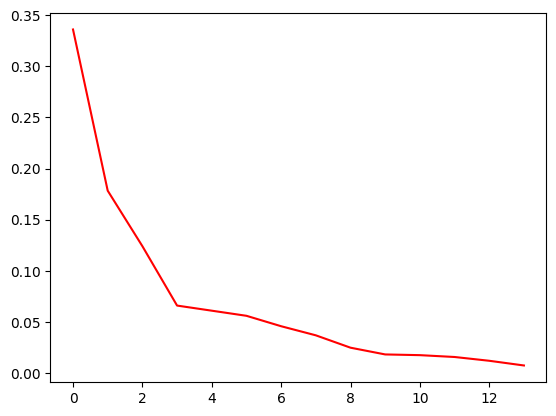

In [37]:
#showing the graphical view

plt.plot(d1,color='red')


In [38]:
#checking the column wise importance
np.sum(d1.iloc[0:4:]*100)

0    70.46
dtype: float64

In [39]:
np.sum(d1.iloc[0:5:]*100)

0    76.56
dtype: float64

In [40]:
np.sum(d1.iloc[0:6:]*100)

0    82.16
dtype: float64

In [41]:
np.sum(d1.iloc[0:7:]*100)

0    86.74
dtype: float64

In [42]:
np.sum(d1.iloc[0:8:]*100)

0    90.43
dtype: float64

In [43]:
np.sum(d1.iloc[0:9:]*100)

0    92.91
dtype: float64

In [44]:
np.sum(d1.iloc[0:10:]*100)

0    94.73
dtype: float64

#we are selecting 1st 7 column


In [45]:
#Final Data Frame
X_final= pc.iloc[:,0:8]

X_final.head(10)

,0,1,2,3,4,5,6,7
0,3.319007,-1.435055,0.469630,-0.166888,0.641501,0.385733,-0.226625,0.820932
1,2.212683,0.351585,2.008271,-0.462324,-0.178392,-0.637574,-0.894624,-0.023243
2,2.518288,-1.029857,-0.553830,0.875169,-0.292512,0.367211,0.548626,0.415710
3,3.759404,-2.746935,0.559668,0.664680,-0.345193,0.428798,0.062485,-0.164125
4,1.012977,-0.863145,-0.943574,0.057026,0.022167,2.038920,-0.514434,1.184588
5,3.052694,-2.111630,0.854539,-0.491864,-0.654153,0.042404,0.131928,0.470456
6,2.451682,-1.162569,1.119946,-0.105752,-0.988579,-0.377905,-0.600089,-0.036426
7,2.055733,-1.622361,-0.671032,-1.301786,0.098215,-0.469196,-1.400387,-0.109275
8,2.514000,-0.900645,1.843964,-0.055023,-0.819889,-0.533970,-0.106352,0.099038
9,2.756473,-0.775447,1.240201,0.370351,-0.472338,0.218658,0.103205,-0.733791


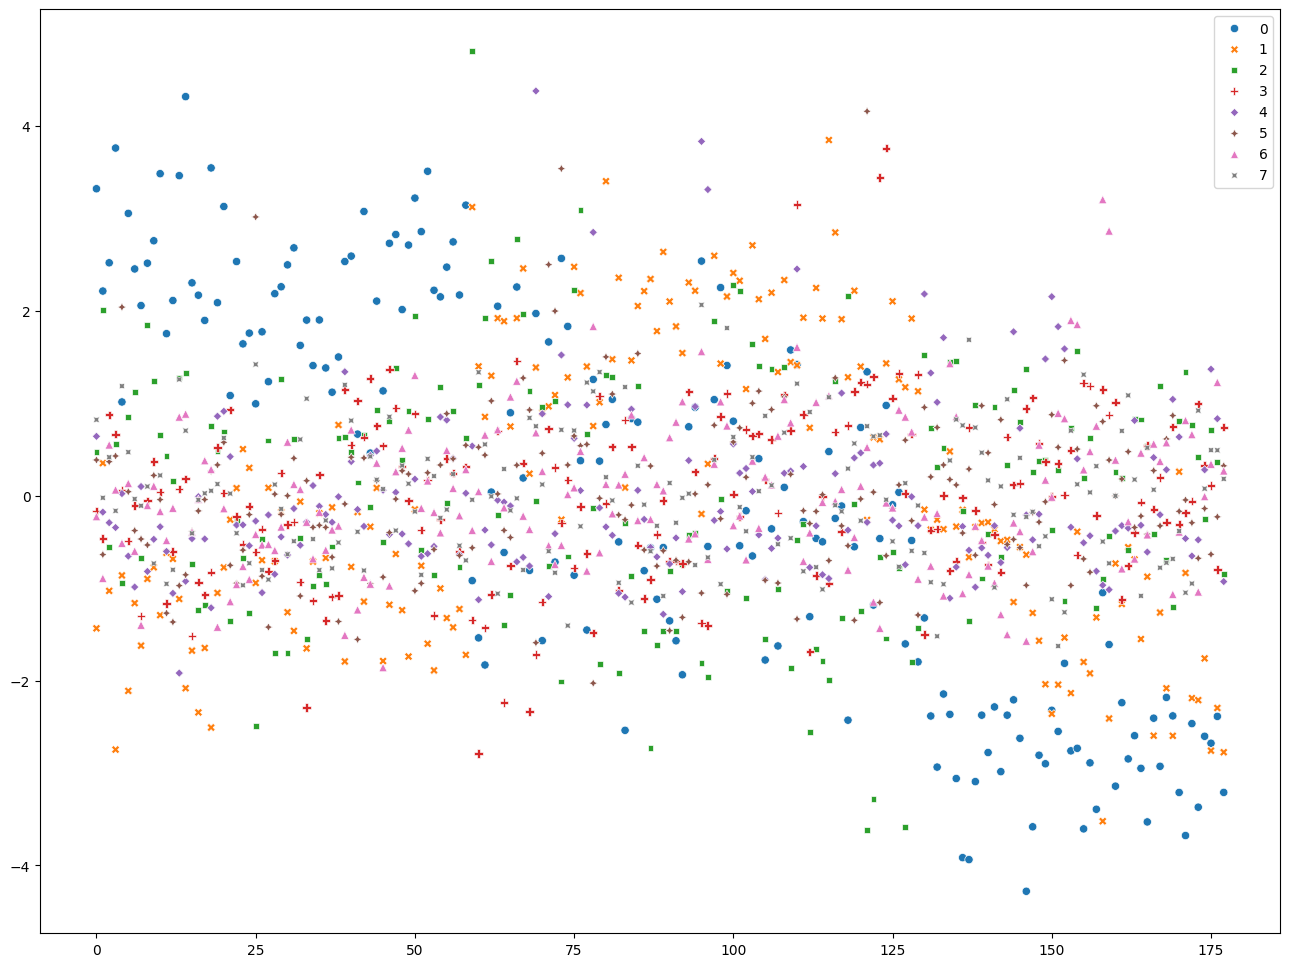

In [46]:
# Visualization of PCAs
import seaborn as sns
fig=plt.figure(figsize=(16,12))
sns.scatterplot(data=X_final);

In [47]:
#predicting the model with logistic regression

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

training_accuracies = []
test_accuracies = []


from sklearn.model_selection  import train_test_split
from sklearn.metrics import accuracy_score
for i in range(1,101):
    X_train,X_test,Y_train,Y_test= train_test_split(X_final,Y,test_size=0.3,random_state=i)
    logreg.fit(X_train,Y_train)
    Y_pred_train=logreg.predict(X_train)
    Y_pred_test=logreg.predict(X_test)
    training_accuracies.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracies.append(accuracy_score(Y_test,Y_pred_test))

print("Cross validation Training Accuracy: ",np.mean(training_accuracies).round(2))
print("Cross validation Test Accuracy: ",np.mean(test_accuracies).round(2))

Cross validation Training Accuracy:  1.0
Cross validation Test Accuracy:  0.96
